In [2]:
from scipy import stats
srcc = stats.spearmanr( [5,8,-1,2], [6,1,9,3])
srcc[0]

-0.7999999999999999

In [3]:
%cd ..


c:\OTHER\ترم 3\پایاننامه\proposal\knowledge distillation\CKDN_code


In [4]:
import predict_one_image



In [5]:
iqa = predict_one_image.IQA_CKDN()

In [6]:
iqa.predict(restored_addr="images1/restored/3.png" , degraded_addr= "images1/degraded/3.png")  # dist , ref

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


0.3415382

In [7]:
dte = iqa.get_DTE_features("images1/restored/3.png")
qse = iqa.get_QSE_features("images1/restored/3.png")
qse_minus = iqa.get_QSE_minus_DTE_features("images1/restored/3.png" , "images1/restored/3.png" )

In [8]:
dte.shape , qse.shape , qse_minus.shape

((1, 256), (1, 256), (1, 256))

## correlation or cosine distance

In [8]:
from scipy import stats
import numpy as np
from scipy.spatial.distance import cosine


r = "S5/test/r.BMP"
d = "S5/test/i04_10_1.bmp"


rr = iqa.get_DTE_features(r)[0]
dd = iqa.get_DTE_features(d)[0]

srcc = stats.spearmanr( rr , dd)
srcc[0] , cosine(rr, dd)

(0.999831912336919, 2.3543834686279297e-05)

In [9]:
import glob
TID_ADDR = "C:\OTHER\\term2\seminars\papers\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\datasets\TID2013"
dsts = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]


def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)

In [10]:
len(get_images_dst(dsts[7])) , len(refs_for_dst) , len(get_mos_dst(dsts[7]))

(125, 125, 125)

In [11]:
get_images_dst(dsts[7])[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i22_08_3.bmp'

In [12]:
refs_for_dst[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/reference_images\\I22.BMP'

In [13]:
get_mos_dst(dsts[7])[107]

3.783

## on contents

In [14]:
contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]


def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

## qse feature afeter minus

In [42]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in dsts:
    
    imgs = get_images_dst(c)
    refs = refs_for_dst


    for i in range(len(imgs)):
        dd = iqa.get_QSE_minus_DTE_features(imgs[i] , refs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

   
    
    print(row)
    row +=1


refs = glob.glob(TID_ADDR+'/reference_images/*')

for r in refs:
    dd = iqa.get_QSE_minus_DTE_features(r , r)[0]
    features1.append(dd)
    contnts.append("456")
    is_ref.append("1")


features1 = np.array(features1)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [43]:
features1.shape , len(contnts) , len(is_ref)

((3025, 256), 3025, 3025)

<AxesSubplot:xlabel='1', ylabel='2'>

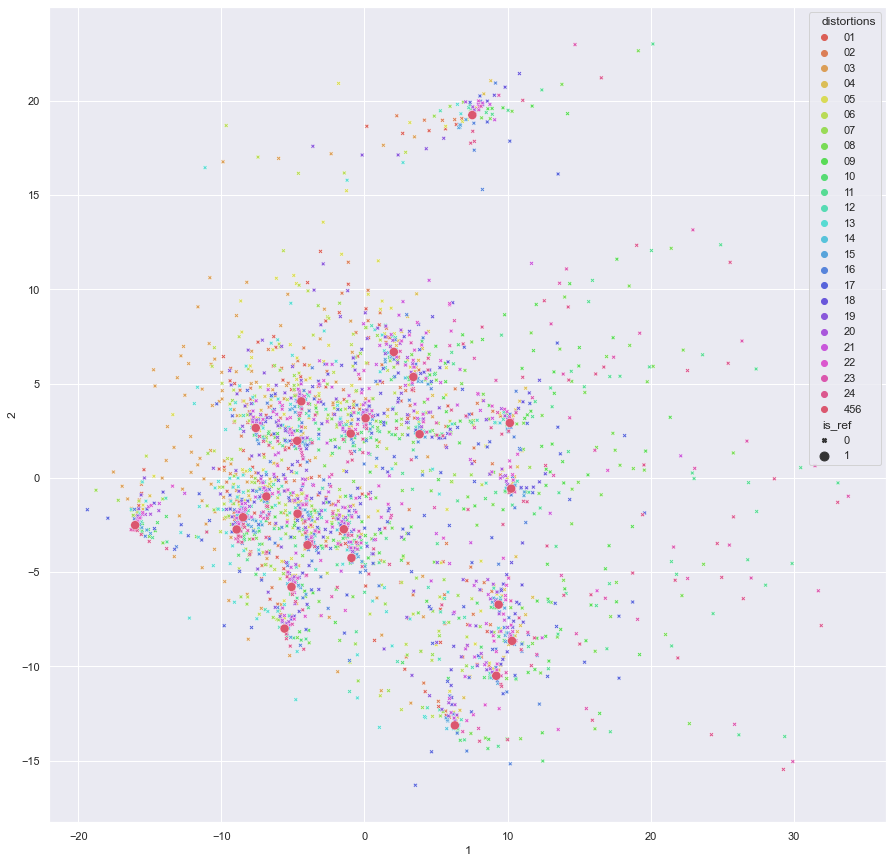

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'distortions':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

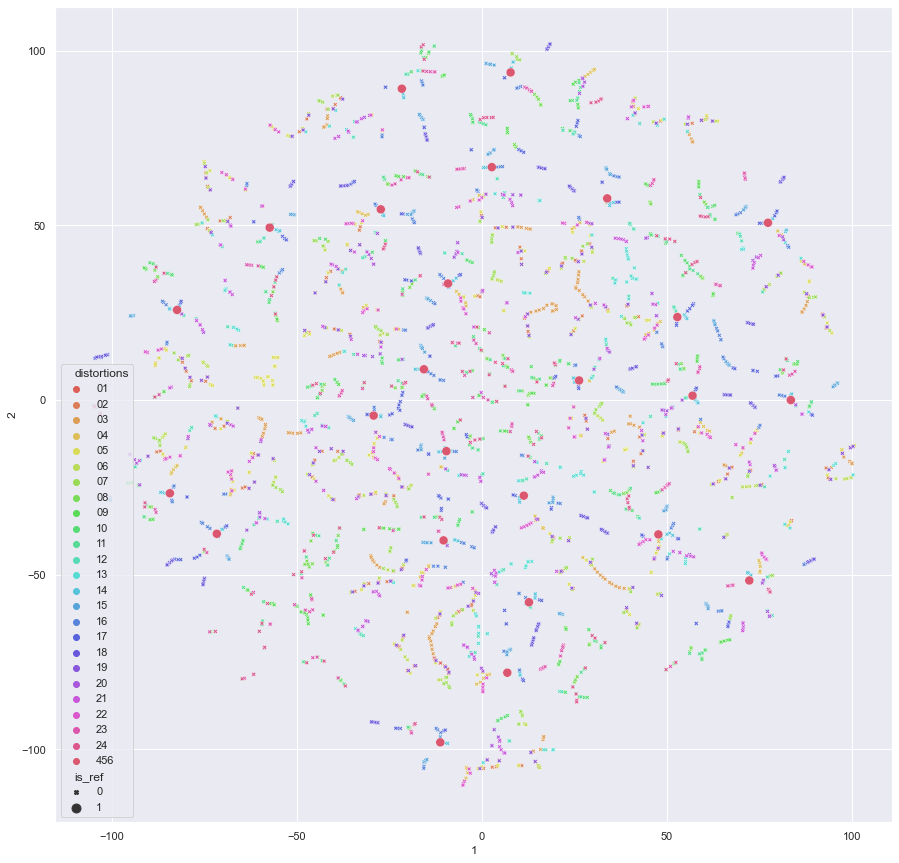

In [46]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'distortions':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## QSE after minus content

In [47]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in contents:
    
    imgs = get_images_content(c)
    refs = get_refs_content(c)


    for i in range(len(imgs)):
        dd = iqa.get_QSE_minus_DTE_features(imgs[i] , refs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

   
    
    print(row)
    row +=1


refs = glob.glob(TID_ADDR+'/reference_images/*')

for r in refs:
    dd = iqa.get_QSE_minus_DTE_features(r , r)[0]
    features1.append(dd)
    contnts.append("456")
    is_ref.append("1")


features1 = np.array(features1)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


<AxesSubplot:xlabel='1', ylabel='2'>

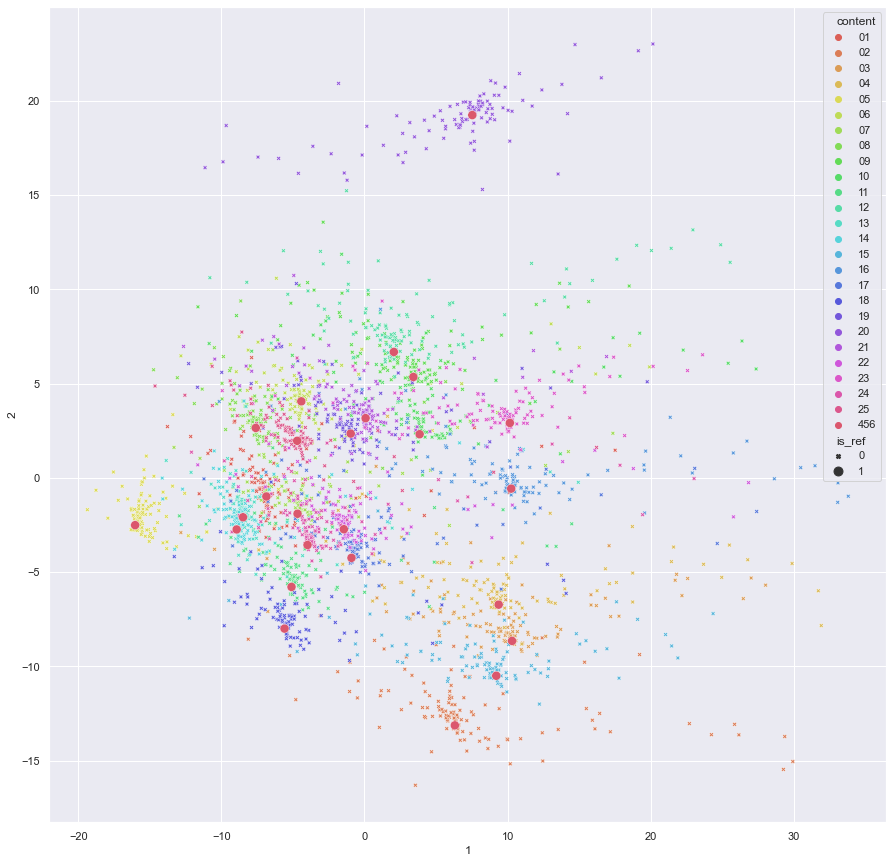

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

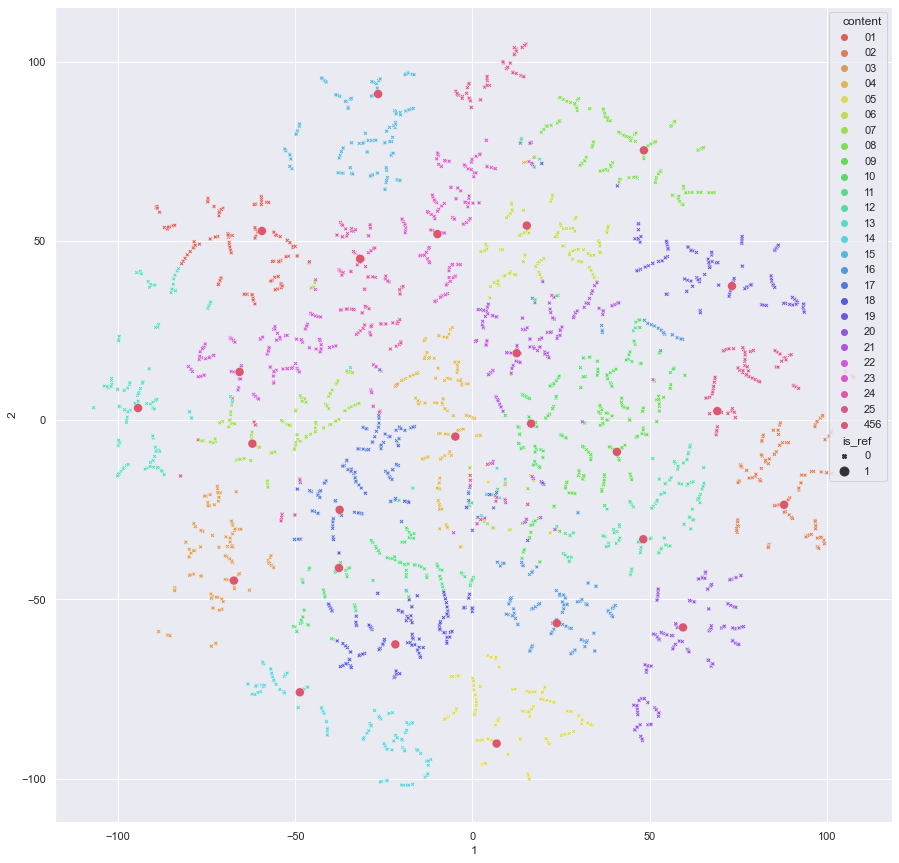

In [49]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

## VGG features 

In [61]:
import torch
from torchvision import models, transforms
from torch.autograd import Variable

# Load the pretrained model
model = models.vgg16(pretrained=True)

# Use the model object to select the desired layer
block4 = model.features[:24]

# Set the model to evaluation mode
block4.eval()



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [64]:
from PIL import Image


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

block4 = block4.to(device)
block4.eval()

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the image
image = Image.open("images1/restored/3.png")

# Apply the transformations and add an extra dimension for the batch
image = transform(image).unsqueeze(0)

# Ensure we're doing this on CPU
image = image.to(device)

# Forward pass
output = block4(image)
output = torch.nn.functional.adaptive_max_pool2d(output, (1, 1))
# Print output
# print(output)

In [69]:
import torch
from torchvision import models, transforms
from torch.autograd import Variable
from PIL import Image

# Load the pretrained model
model = models.vgg16(pretrained=True)

# Use the model object to select the desired layer
block4 = model.features[:24]



def get_features_from_vgg_block_4(img_addr , block4 = block4):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    block4 = block4.to(device)
    block4.eval()

    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load the image
    image = Image.open(img_addr)

    # Apply the transformations and add an extra dimension for the batch
    image = transform(image).unsqueeze(0)

    # Ensure we're doing this on CPU
    image = image.to(device)

    # Forward pass
    output = block4(image)
    output = torch.nn.functional.adaptive_max_pool2d(output, (1, 1))

    output = torch.squeeze(output)

    # Convert the tensor to a numpy array
    output_np = output.cpu().detach().numpy()
    return output_np


    

In [71]:
get_features_from_vgg_block_4("images1/restored/3.png").shape

(512,)

# Bosse features:

In [18]:

import numpy as np



# Load the array from the file
features_bosse = np.load('S10/all_features.npy')
img_names = np.load('S10/img_names.npy')



In [35]:
features_bosse.shape

(3025, 32, 512)

In [36]:
features_bosse1 = features_bosse.reshape(3025, -1)

features_bosse1.shape

(3025, 16384)

In [38]:
content_bosse = []
dst_bosse = []
is_ref = []
c = 0
for im in img_names:
    c+=1
    content_bosse.append(im.split("\\")[-1].split("_")[0][1:3])
    if c > 3000:
        dst_bosse.append("000")
        is_ref.append("1")
    else:
        dst_bosse.append(im.split("\\")[-1].split("_")[1])
        is_ref.append("0")


# distortion

<AxesSubplot:xlabel='1', ylabel='2'>

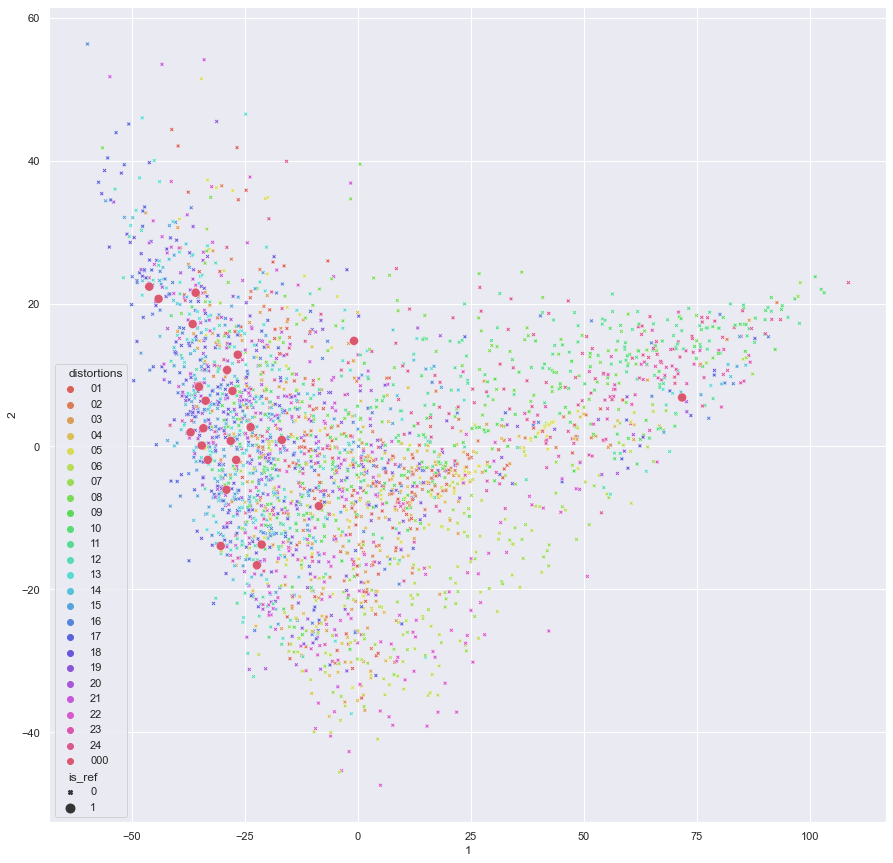

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features_bosse1)

df = pd.DataFrame({'distortions':dst_bosse,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

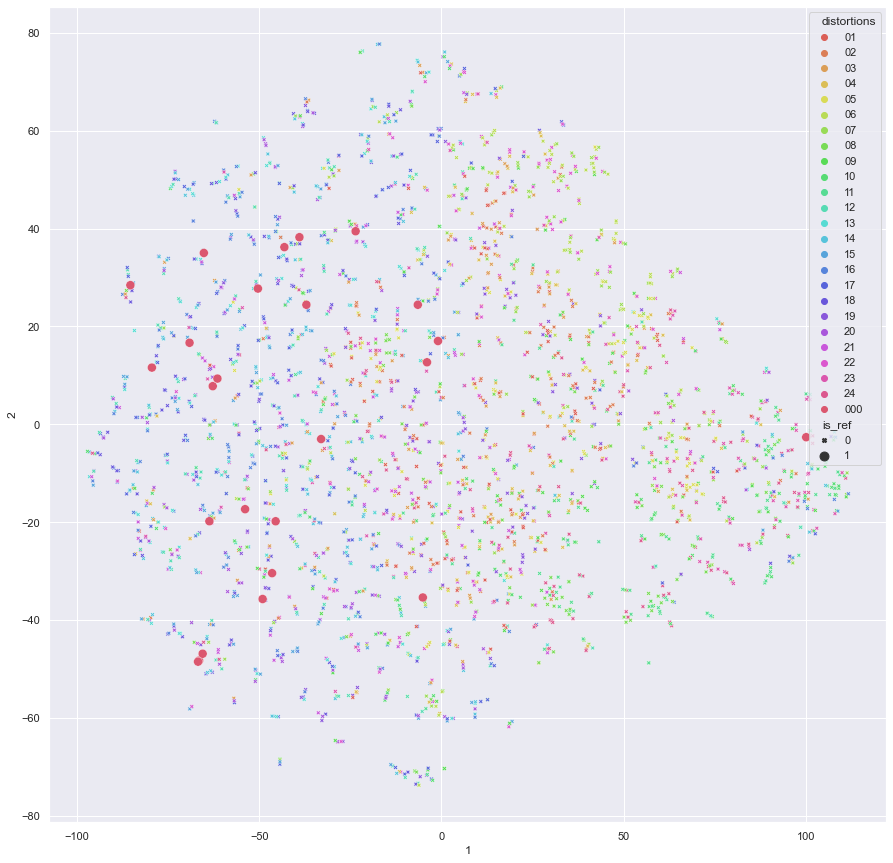

In [54]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features_bosse1)

df = pd.DataFrame({'distortions':dst_bosse,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='distortions',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

# content

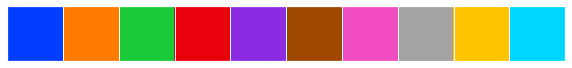

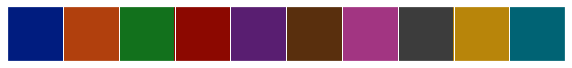

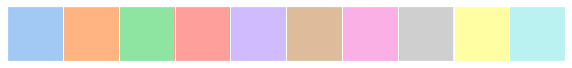

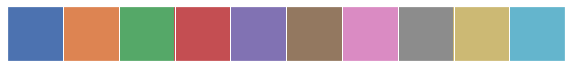

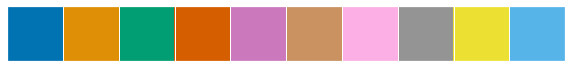

In [49]:
## Example of different seaborn palettes
sns.palplot(sns.color_palette("bright", 10))
sns.palplot(sns.color_palette("dark", 10))
sns.palplot(sns.color_palette("pastel", 10))
sns.palplot(sns.color_palette("deep", 10))
sns.palplot(sns.color_palette("colorblind", 10))


<AxesSubplot:xlabel='1', ylabel='2'>

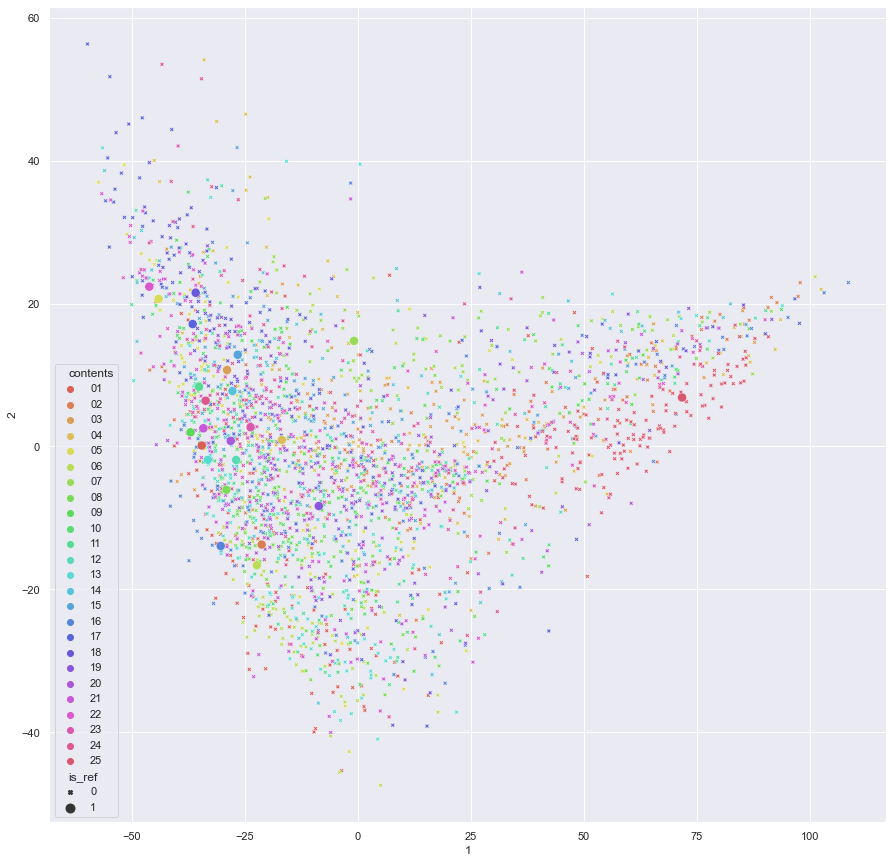

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features_bosse1)

df = pd.DataFrame({'contents':content_bosse,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='contents',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])




<AxesSubplot:xlabel='1', ylabel='2'>

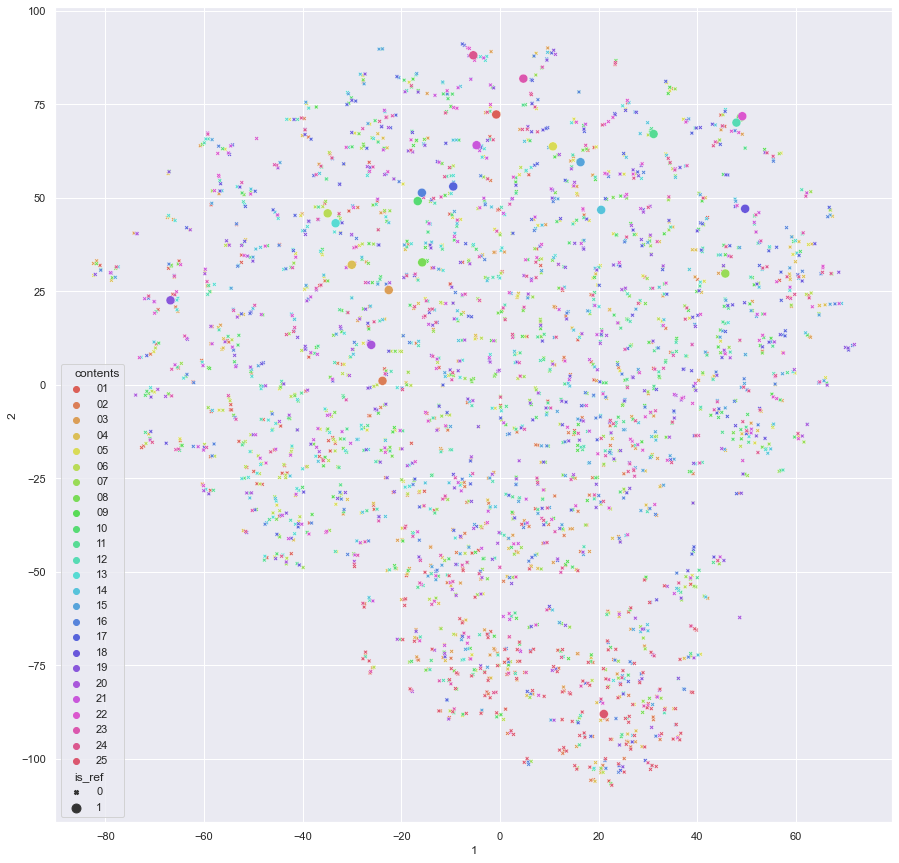

In [55]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features_bosse1)

df = pd.DataFrame({'contents':content_bosse,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='contents',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

# classification on DTE and VGG features:

In [31]:
import glob

all_train = glob.glob("S10/imageNet20/ImageNet-20-Val/*/*")


len(all_train)







500

In [32]:
import time

DTE_features = []
c = 0

for im in all_train:
    c+=1
    if c %1000 == 5:
        print(c)
        time.sleep(6)

    DTE_features.append(iqa.get_DTE_features(im))





c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


5


In [33]:
import numpy as np 

DTE_features = np.array(DTE_features)
all_train = np.array(all_train)

np.save('S10/test_DTE_imNET20_features.npy', DTE_features)    # .npy extension is added if not given
np.save('S10/test_imNET20_names.npy', all_train)    # .npy extension is added if not given
    
    

DTE_features.shape , all_train.shape

((500, 1, 256), (500,))

vgg block4

In [14]:
import torch
from torchvision import models, transforms
from torch.autograd import Variable

# Load the pretrained model
model = models.vgg16(pretrained=True)

# Use the model object to select the desired layer
block4 = model.features[:24]

# Set the model to evaluation mode
block4.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [15]:
from PIL import Image


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

block4 = block4.to(device)
block4.eval()

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])



In [18]:
import torch
from torchvision import models, transforms
from torch.autograd import Variable
from PIL import Image
import cv2
# Load the pretrained model
model = models.vgg16(pretrained=True)

# Use the model object to select the desired layer
block4 = model.features[:24]



def get_features_from_vgg_block_4(img_addr , block4 = block4):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    block4 = block4.to(device)
    block4.eval()

    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load the image
    img = cv2.imread(img_addr)

    image = Image.fromarray(img)
    # Apply the transformations and add an extra dimension for the batch
    image = transform(image).unsqueeze(0)

    # Ensure we're doing this on CPU
    image = image.to(device)

    # Forward pass
    output = block4(image)
    output = torch.nn.functional.adaptive_max_pool2d(output, (1, 1))

    output = torch.squeeze(output)

    # Convert the tensor to a numpy array
    output_np = output.cpu().detach().numpy()
    return output_np


# get_features_from_vgg_block_4(all_train[2])

In [34]:
import time
import numpy as np

VGGb4_features = []
c = 0

for im in all_train:
    c+=1
    if c %100 == 5:
        print(c)
        time.sleep(8)

    VGGb4_features.append(get_features_from_vgg_block_4(im))



VGGb4_features = np.array(VGGb4_features)

np.save('S10/test_VGGb4_imNET20_features.npy', VGGb4_features)    # .npy extension is added if not given
    
    

VGGb4_features.shape

5
105
205
305
405


(500, 512)

# classification 

vgg

In [9]:
import numpy as np

train_names = np.load('S10/train_imNET20_names.npy')
test_names = np.load('S10/test_imNET20_names.npy')

train_feature_vgg = np.load("S10/train_VGGb4_imNET20_features.npy")
test_feature_vgg = np.load("S10/test_VGGb4_imNET20_features.npy")


train_names.shape , test_names.shape , train_feature_vgg.shape , test_feature_vgg.shape


((13000,), (500,), (13000, 512), (500, 512))

In [11]:
gt_train = []

for im in train_names:
    gt_train.append(int(im.split("\\")[1][-3:]))

len(gt_train) , gt_train[567]



gt_test = []

for im in test_names:
    gt_test.append(int(im.split("\\")[1][-3:]))

len(gt_test) , gt_test[67]  ,len(gt_train) , gt_train[567]


(500, 850, 13000, 537)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import SVC

# Shuffle the training data and ground truth labels
train_feature_vgg, gt_train = shuffle(train_feature_vgg, gt_train, random_state=0)

# Train the SVM classifier
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train_feature_vgg, gt_train)







Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [13]:
clf.predict([train_feature_vgg[290]])


array([488])

              precision    recall  f1-score   support

          65       0.97      0.97      0.97      1300
          81       0.99      0.99      0.99      1300
         366       0.99      0.99      0.99      1300
         413       0.99      0.99      0.99      1300
         432       1.00      0.99      0.99      1300
         458       1.00      0.99      0.99      1300
         475       0.96      0.97      0.97      1300
         488       0.98      0.99      0.99      1300
         537       0.99      1.00      0.99      1300
         850       0.97      0.97      0.97      1300

    accuracy                           0.99     13000
   macro avg       0.99      0.99      0.99     13000
weighted avg       0.99      0.99      0.99     13000



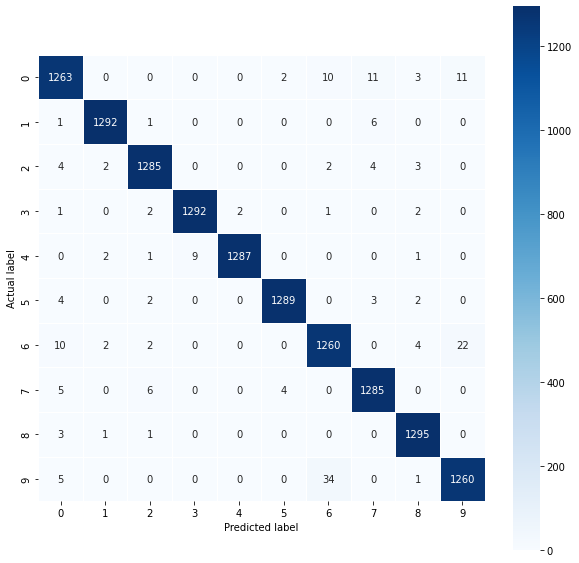

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels of the test set
y_pred = clf.predict(train_feature_vgg)

# Generate the confusion matrix
cm = confusion_matrix(gt_train, y_pred)

# Generate the classification report
cr = classification_report(gt_train, y_pred)

# Print the classification report
print(cr)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


              precision    recall  f1-score   support

          65       0.93      0.84      0.88        50
          81       0.96      0.94      0.95        50
         366       0.80      0.94      0.86        50
         413       0.84      0.92      0.88        50
         432       0.93      0.82      0.87        50
         458       0.98      0.90      0.94        50
         475       0.85      0.80      0.82        50
         488       0.91      0.86      0.89        50
         537       0.85      0.88      0.86        50
         850       0.80      0.90      0.85        50

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



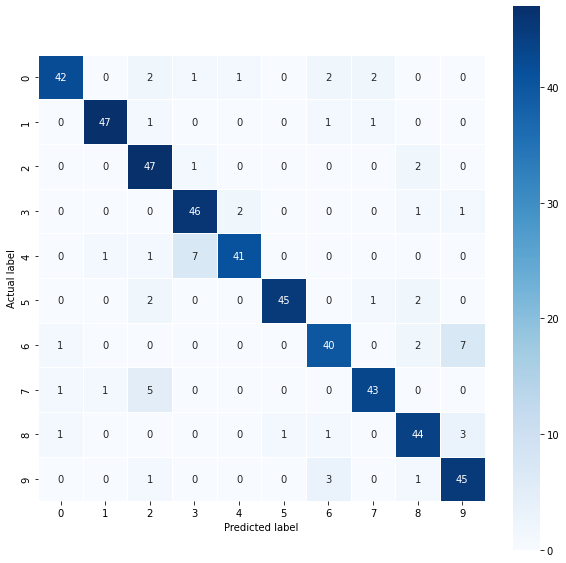

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels of the test set
y_pred = clf.predict(test_feature_vgg)

# Generate the confusion matrix
cm = confusion_matrix(gt_test, y_pred)

# Generate the classification report
cr = classification_report(gt_test, y_pred)

# Print the classification report
print(cr)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


DTE:

In [20]:
import numpy as np

train_names = np.load('S10/train_imNET20_names.npy')
test_names = np.load('S10/test_imNET20_names.npy')

train_feature_dte = np.load("S10/train_DTE_imNET20_features.npy")
test_feature_dte = np.load("S10/test_DTE_imNET20_features.npy")

train_feature_dte = train_feature_dte.reshape(13000, 256)
test_feature_dte = test_feature_dte.reshape(500, 256)

train_names.shape , test_names.shape , train_feature_dte.shape , test_feature_dte.shape

((13000,), (500,), (13000, 256), (500, 256))

In [21]:
gt_train = []

for im in train_names:
    gt_train.append(int(im.split("\\")[1][-3:]))

len(gt_train) , gt_train[567]



gt_test = []

for im in test_names:
    gt_test.append(int(im.split("\\")[1][-3:]))

len(gt_test) , gt_test[67]  ,len(gt_train) , gt_train[567]

(500, 850, 13000, 537)

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import SVC

# Shuffle the training data and ground truth labels
train_feature_dte, gt_train = shuffle(train_feature_dte, gt_train, random_state=0)

# Train the SVM classifier
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train_feature_dte, gt_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

              precision    recall  f1-score   support

          65       0.62      0.59      0.60      1300
          81       0.76      0.71      0.74      1300
         366       0.63      0.69      0.66      1300
         413       0.62      0.66      0.64      1300
         432       0.79      0.72      0.75      1300
         458       0.75      0.77      0.76      1300
         475       0.68      0.66      0.67      1300
         488       0.73      0.80      0.76      1300
         537       0.81      0.81      0.81      1300
         850       0.75      0.71      0.73      1300

    accuracy                           0.71     13000
   macro avg       0.71      0.71      0.71     13000
weighted avg       0.71      0.71      0.71     13000



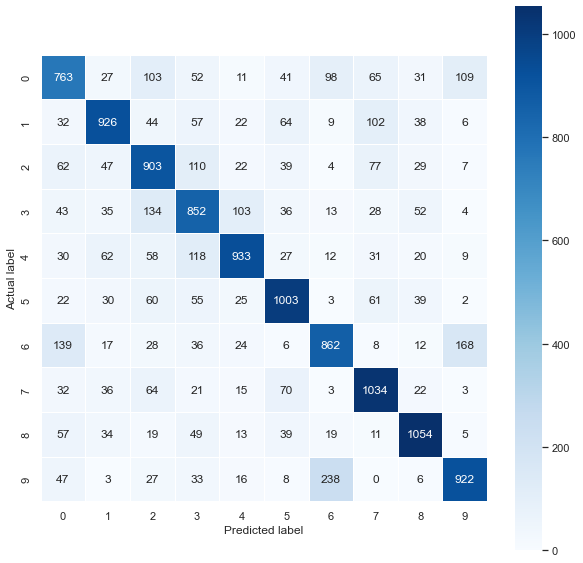

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels of the test set
y_pred = clf.predict(train_feature_dte)

# Generate the confusion matrix
cm = confusion_matrix(gt_train, y_pred)

# Generate the classification report
cr = classification_report(gt_train, y_pred)

# Print the classification report
print(cr)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

          65       0.54      0.42      0.47        50
          81       0.63      0.68      0.65        50
         366       0.49      0.56      0.52        50
         413       0.47      0.54      0.50        50
         432       0.82      0.66      0.73        50
         458       0.76      0.56      0.64        50
         475       0.64      0.70      0.67        50
         488       0.77      0.82      0.80        50
         537       0.68      0.78      0.73        50
         850       0.70      0.70      0.70        50

    accuracy                           0.64       500
   macro avg       0.65      0.64      0.64       500
weighted avg       0.65      0.64      0.64       500



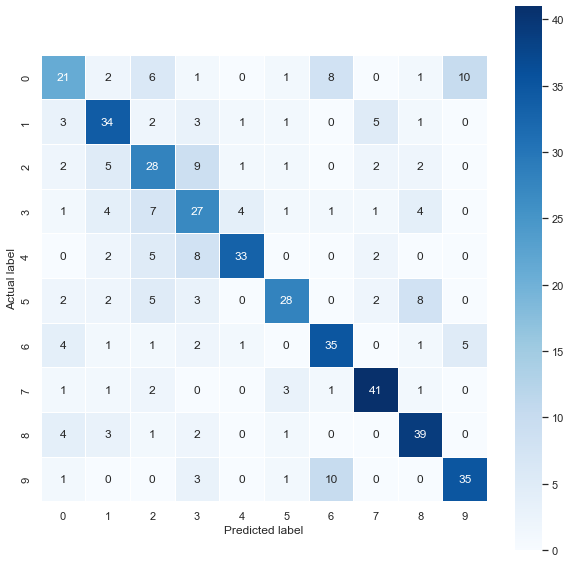

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels of the test set
y_pred = clf.predict(test_feature_dte)

# Generate the confusion matrix
cm = confusion_matrix(gt_test, y_pred)

# Generate the classification report
cr = classification_report(gt_test, y_pred)

# Print the classification report
print(cr)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()